In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap

In [2]:
v1_data = pd.read_csv('energy_monitor_v1.csv')
v1_data.loc[:, 'Energy'] *= 1e-6 # Convert energy to Joules

v2_data = pd.read_csv('energy_monitor_v2.csv')
v2_data.loc[:, 'Energy'] *= 1e-6 # Convert energy to Joules

v2_data.head()

,Energy,Time
0,601.878965,5.002390
1,602.309121,5.002393
2,601.870897,5.002407
3,602.425890,5.002353
4,602.746379,5.002338


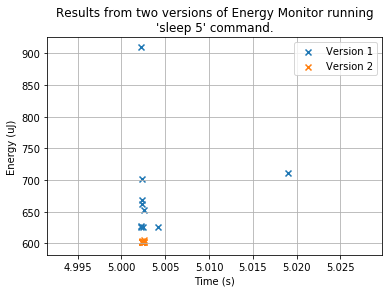

In [13]:
plt.figure()
plt.scatter(v1_data['Time'].values, v1_data['Energy'].values,
           marker='x',
           label='Version 1')
plt.scatter(v2_data['Time'].values, v2_data['Energy'].values,
           marker='x',
           label='Version 2')
plt.title('\n'.join(wrap('Results from two versions of Energy Monitor running \'sleep 5\' command.', 55)))
plt.xlabel('Time (s)')
plt.ylabel('Energy (uJ)')
plt.grid()
plt.legend()
plt.show()

In [4]:
node_comparison_data = pd.read_csv('node_energy_variation.csv')
node_comparison_data.loc[:, 'Energy'] *= 1e-6 # Convert energy to Joules

average_data = node_comparison_data.groupby(['Machine'], as_index=False).agg({'Energy':'mean', 'Time':'mean'})
average_data.head()

,Machine,Energy,Time
0,compute076,520.562852,10.011185
1,compute105,496.330928,10.011475
2,compute110,535.278427,10.010399
3,compute112,497.210703,10.010064
4,compute113,504.096454,10.008923


In [5]:
machine_ids = node_comparison_data["Machine"].unique()
print(machine_ids)

['compute390' 'compute076' 'compute283' 'compute395' 'compute113'
 'compute112' 'compute110' 'compute105' 'compute308' 'compute284']


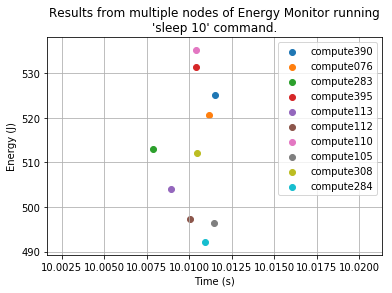

In [11]:
plt.figure()

for machine_id in machine_ids:
    machine_data = average_data[average_data["Machine"] == machine_id]
    plt.scatter(machine_data['Time'].values, machine_data['Energy'].values,
               label=machine_id)

plt.title('\n'.join(wrap('Results from multiple nodes of Energy Monitor running \'sleep 10\' command.', 55)))
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.grid()
plt.legend()
plt.show()

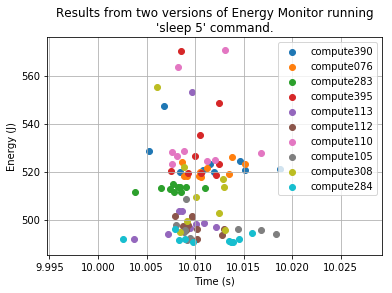

In [12]:
plt.figure()

for machine_id in machine_ids:
    machine_data = node_comparison_data[node_comparison_data["Machine"] == machine_id]
    plt.scatter(machine_data['Time'].values, machine_data['Energy'].values,
               label=machine_id)

plt.title('\n'.join(wrap('Results from two versions of Energy Monitor running \'sleep 5\' command.', 55)))
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.grid()
plt.legend()
plt.show()